# Machine Learning - Logistic Regression

In [15]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv("C:\\Users\\abuen\\OneDrive\\00 - BUSINNESS INTELLIGENCE\\MODULO_2\\DATASET\\diabetes.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
column_names = [
    'pregnancy_x',
    'plasma_con',
    'blood_pressure',
    'skin_mm',
    'insulin',
    'bmi',
    'pedigree_func',
    'age',
    'target'
]

df.columns = column_names


In [32]:
df.head()

,pregnancy_x,plasma_con,blood_pressure,skin_mm,insulin,bmi,pedigree_func,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Aunque los valores parecen estar bien a simple vista, tener 0 en 'insulin' o 'skin_mm' puede no ser realista.
# Es probable que esos ceros representen datos faltantes y no mediciones reales. Hay que tenerlo en cuenta al limpiar.

# Verificar si hay valores nulos
df.isnull().sum()

pregnancy_x       0
plasma_con        0
blood_pressure    0
skin_mm           0
insulin           0
bmi               0
pedigree_func     0
age               0
target            0
dtype: int64

In [36]:
# Verificar si hay valores cero en las columnas que no deberían tenerlos
zero_columns = ['insulin', 'skin_mm']

In [37]:
# Verificar si hay ceros en las columnas
for col in zero_columns:
    zero_count = (df[col] == 0).sum()
    print(f"Cantidad de ceros en {col}: {zero_count}")
    if zero_count > 0:
        print(f"Hay {zero_count} ceros en la columna {col}. Esto puede ser un problema.")
    else:
        print(f"No hay ceros en la columna {col}.")

Cantidad de ceros en insulin: 374
Hay 374 ceros en la columna insulin. Esto puede ser un problema.
Cantidad de ceros en skin_mm: 227
Hay 227 ceros en la columna skin_mm. Esto puede ser un problema.


In [39]:
# Reemplazar los ceros en 'insulin' y 'skin_mm' por NaN
df['insulin'] = df['insulin'].replace(0, np.nan) 
df['skin_mm'] = df['skin_mm'].replace(0, np.nan)

# Verificar nuevamente si hay valores nulos
df.isnull().sum()


pregnancy_x         0
plasma_con          0
blood_pressure      0
skin_mm           227
insulin             0
bmi                 0
pedigree_func       0
age                 0
target              0
dtype: int64

In [41]:
# Imputar los valores nulos con la media de cada columna
df['insulin'] = df['insulin'].fillna(df['insulin'].mean())
df['skin_mm'] = df['skin_mm'].fillna(df['skin_mm'].mean())
# Verificar nuevamente si hay valores nulos
df.isnull().sum()

pregnancy_x       0
plasma_con        0
blood_pressure    0
skin_mm           0
insulin           0
bmi               0
pedigree_func     0
age               0
target            0
dtype: int64

In [ ]:
# Verificar si hay valores cero en las columnas que no deberían tenerlos
for col in zero_columns:
    zero_count = (df[col] == 0).sum()
    print(f"Cantidad de ceros en {col}: {zero_count}")
    if zero_count > 0:
        print(f"Hay {zero_count} ceros en la columna {col}. Esto puede ser un problema.")
    else:
        print(f"No hay ceros en la columna {col}.")

Cantidad de ceros en insulin: 0
No hay ceros en la columna insulin.
Cantidad de ceros en skin_mm: 0
No hay ceros en la columna skin_mm.


In [44]:
# Verificar si hay valores duplicados
duplicates = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicates}")
# Si hay duplicados, eliminarlos
if duplicates > 0:
    df = df.drop_duplicates()
    print("Filas duplicadas eliminadas.")
else:
    print("No hay filas duplicadas.")
# Verificar nuevamente si hay valores duplicados
duplicates = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicates}")    

Cantidad de filas duplicadas: 0
No hay filas duplicadas.
Cantidad de filas duplicadas: 0


In [45]:
# Verificar la correlación entre las variables
correlation_matrix = df.corr()  


Text(0.5, 1.0, 'Matriz de Correlación')

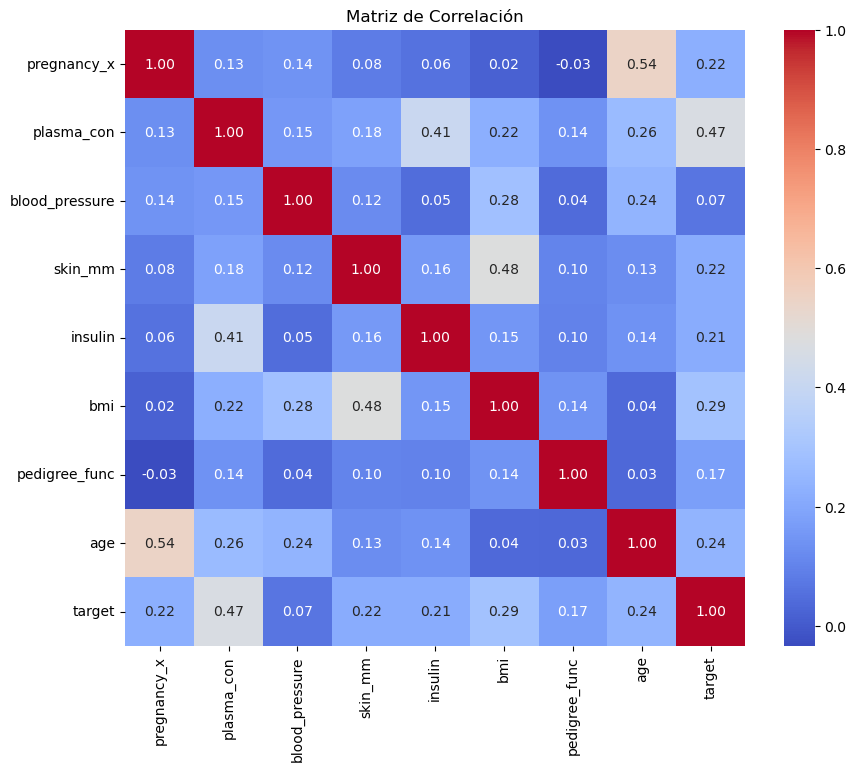

In [46]:
# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación") 

In [49]:
#plt.show()
#plt.savefig("C:\\Users\\abuen\\OneDrive\\00 - BUSINNESS INTELLIGENCE\\MODULO_2\\DATASET\\correlation_matrix.png")


Text(0.5, 1.0, 'Distribución de la variable objetivo')

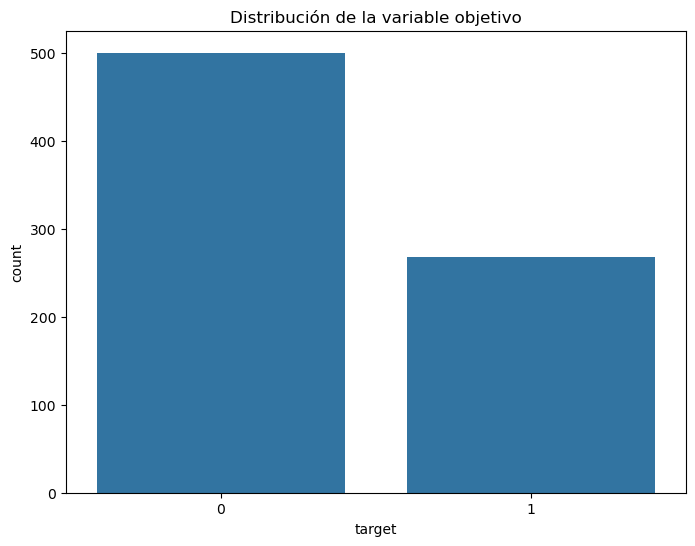

In [50]:
# Graficar la distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title("Distribución de la variable objetivo")

In [52]:
#plt.show()
#plt.savefig("C:\\Users\\abuen\\OneDrive\\00 - BUSINNESS INTELLIGENCE\\MODULO_2\\DATASET\\target_distribution.png") 


In [53]:
# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = df.drop('target', axis=1)

In [54]:
# Dividir el conjunto de datos en características (X) y variable objetivo (y)
y = df['target']   

In [55]:
#  Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [57]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test) 

In [60]:
# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))


Matriz de confusión:
[[79 20]
 [19 36]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


Precisión del modelo:
0.7467532467532467


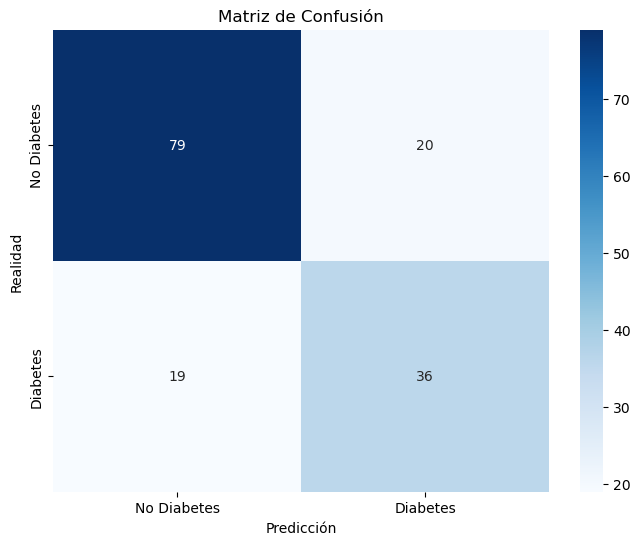

In [62]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.xticks(ticks=[0.5, 1.5], labels=['No Diabetes', 'Diabetes'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Diabetes', 'Diabetes'])
plt.show()